In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image

In [14]:
def imshow(image,w=5, h=5):
    plt.figure(figsize=(w,h))
    plt.imshow(image, cmap='gray')

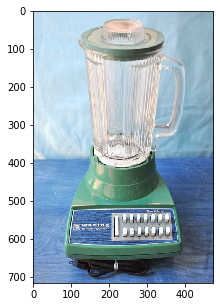

In [284]:
img = cv2.imread('img.jpeg')
imshow(img)

In [285]:
np.median(img)

178.0

# Appling Gaussian Blur

We will apply the gaussian blur to remove unwanted noise and informations

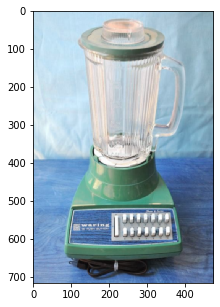

In [286]:
blurred = cv2.GaussianBlur(img, (5,5),0)  # As canny edge detector required removal of noise by 5x5 filter
imshow(blurred)

# Apply edge detection

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


### Remove Salt and Pepper noise using median filter
Salt and peeper noise is a form of noise also known as ‘impulse noise’. It can be produced by sharp disturbances in the image signal. It manifests itself in the form of white and black pixels. To address this, median filter will be used. It works by zeroing out any intensities below the mean of all intensities throughout the image.

### Error
if we do this <code>edge = cv2.Canny(blurred/255., 150, 15)</code> we get <br>
<code>error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'</code>
#### Solution: https://stackoverflow.com/a/49416559

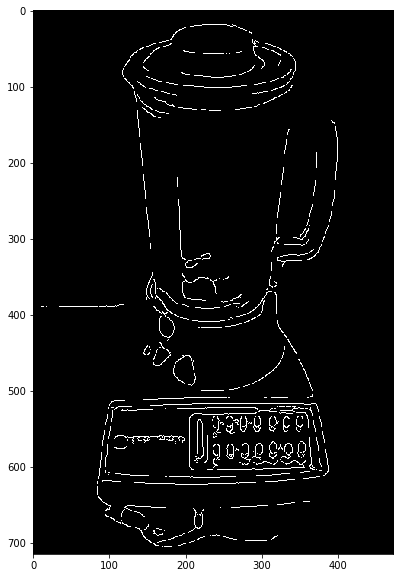

In [353]:
imgf = cv2.medianBlur(blurred, 9)
edge = cv2.Canny(imgf, 50, 150)
imshow(edge,10, 10)

# Find countours
Remove any contours that do not take at least 5% of the image in area.

https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71

In [360]:
contours, hierarchy = cv2.findContours(edge,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [361]:
# https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html#:~:text=Hierarchy%20Representation%20in%20OpenCV,*
hierarchy  #[Next, Previous, First_Child, Parent]

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        [  4,   2,  -1,  -1],
        [  5,   3,  -1,  -1],
        [  6,   4,  -1,  -1],
        [  7,   5,  -1,  -1],
        [  9,   6,   8,  -1],
        [ -1,  -1,  -1,   7],
        [ 10,   7,  -1,  -1],
        [ 11,   9,  -1,  -1],
        [ 12,  10,  -1,  -1],
        [ 13,  11,  -1,  -1],
        [ 14,  12,  -1,  -1],
        [ 15,  13,  -1,  -1],
        [ 16,  14,  -1,  -1],
        [ 20,  15,  17,  -1],
        [ 18,  -1,  -1,  16],
        [ 19,  17,  -1,  16],
        [ -1,  18,  -1,  16],
        [ 22,  16,  21,  -1],
        [ -1,  -1,  -1,  20],
        [ 23,  20,  -1,  -1],
        [ 24,  22,  -1,  -1],
        [ 25,  23,  -1,  -1],
        [ 28,  24,  26,  -1],
        [ 27,  -1,  -1,  25],
        [ -1,  26,  -1,  25],
        [ 31,  25,  29,  -1],
        [ 30,  -1,  -1,  28],
        [ -1,  29,  -1,  28],
        [ 32,  28,  -1,  -1],
        [ 33,  31,  -1,  -1],
        [ 

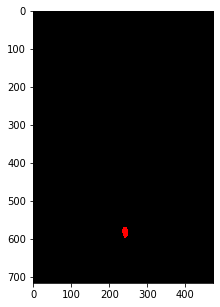

In [364]:
# https://www.tutorialspoint.com/find-and-draw-contours-using-opencv-in-python
Cimg = cv2.drawContours(np.zeros(img.shape).astype(np.uint8), contours, 20,255,5)
imshow(Cimg)

# Masking probable backgrounds